## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [10]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [11]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [12]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    a = x.min()
    b = x.max()
    x = (x - a)/(b - a) 
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [16]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [17]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.3630 - acc: 0.8692 - val_loss: 2.9727 - val_acc: 0.5003
Epoch 2/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.3297 - acc: 0.8803 - val_loss: 2.8960 - val_acc: 0.4991
Epoch 3/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.3500 - acc: 0.8739 - val_loss: 2.9301 - val_acc: 0.4998
Epoch 4/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.3108 - acc: 0.8898 - val_loss: 2.9759 - val_acc: 0.5024
Epoch 5/100
50000/50000 [==============================] - 6s 118us/step - loss: 0.3183 - acc: 0.8859 - val_loss: 2.9800 - val_acc: 0.4984
Epoch 6/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.2872 - acc: 0.8980 - val_loss: 3.0142 - val_acc: 0.4966
Epoch 7/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.3348 - acc: 0.8798 - val_loss: 3.

50000/50000 [==============================] - 6s 112us/step - loss: 0.2153 - acc: 0.9231 - val_loss: 3.6539 - val_acc: 0.5009
Epoch 60/100
50000/50000 [==============================] - 6s 112us/step - loss: 0.1869 - acc: 0.9332 - val_loss: 3.7103 - val_acc: 0.4978
Epoch 61/100
50000/50000 [==============================] - 6s 112us/step - loss: 0.2332 - acc: 0.9184 - val_loss: 3.8108 - val_acc: 0.4940
Epoch 62/100
50000/50000 [==============================] - 6s 112us/step - loss: 0.1979 - acc: 0.9296 - val_loss: 3.8300 - val_acc: 0.4922
Epoch 63/100
50000/50000 [==============================] - 6s 112us/step - loss: 0.1774 - acc: 0.9378 - val_loss: 3.7303 - val_acc: 0.4905
Epoch 64/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.1979 - acc: 0.9296 - val_loss: 3.8409 - val_acc: 0.4901
Epoch 65/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.2373 - acc: 0.9157 - val_loss: 3.8096 - val_acc: 0.5004
Epoch 66/100
50000/50000 [=======

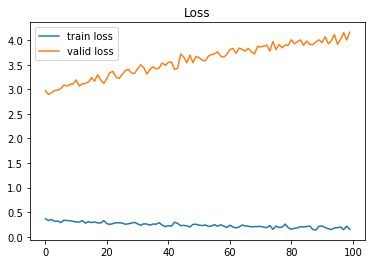

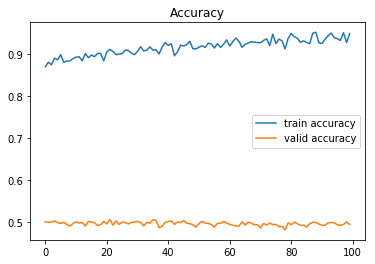

In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()